# Logistic Regression with a Neural Network mindset

欢迎来到您的第一个（必填）编程任务！你将建立一个逻辑回归分类器来识别猫。这个任务将指导你如何用神经网络的思维方式做到这一点，所以也将磨练你对深度学习的直觉。

**说明：**

不要在代码中使用循环（for / while），除非指令明确要求您这样做。

**您将学习：**

构建一个学习算法的总体架构，包括：
- 初始化参数
- 计算成本函数及其梯度
- 使用优化算法（梯度下降）
将上述三个函数按照正确的顺序收集到主模型函数中。

## 1 - Packages ##

首先，运行下面的单元格，导入您在此作业中需要的所有软件包。
- [numpy](www.numpy.org) 科学计算的基本软件包。
- [h5py](http://www.h5py.org) 是与数据集（存储在H5文件中的数据集）交互的常用软件包。
- [matplotlib](http://matplotlib.org) 著名的绘图工具
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) 最后环节用自己的图片测试自己的模型。

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset

# 作用：当调用plt.plot()进行绘图时，可以直接出现图像，不用写plt.show()
%matplotlib inline  

## 2 - Overview of the Problem set ##

**Problem Statement**: 给你一个数据集 ("data.h5") ，它包含以下信息:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

您将构建一个简单的图像识别算法，可以正确地将图片分类为猫或非猫

现在来熟悉下数据集。运行下面的代码加载数据。

In [43]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

深度学习中的很多software bugs都是因为矩阵/矢量的维度不匹配。如果你能保证矩阵/向量维度的正确，可以消除许多错误

In [44]:
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


train_set_x_orig和test_set_x_orig的每一行都是一个表示图像的数组。您可以通过运行以下代码来可视化示例。随意更改index值并重新运行以查看其他图像。

y = 0, it's a b'non-cat' picture.


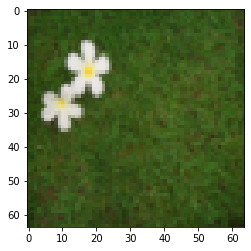

In [46]:
index = 6
plt.imshow(train_set_x_orig[index])
flag_isCat = train_set_y[0, index]
str_class = str(classes[flag_isCat])
print ("y = " + str(train_set_y[0, index]) + ", it's a " + str_class +  " picture.")

为了方便起见，我们要  
把训练集ndarray的形状变为（64$*$64$*$3，209）  
把测练集ndarray的形状变为（64$*$64$*$3，50）

In [49]:
num_px = train_set_x_orig.shape[1]
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
train_set_x_flatten = train_set_x_orig.reshape(num_px*num_px*3, -1)
test_set_x_flatten = test_set_x_orig.reshape(num_px*num_px*3, -1)
print(train_set_x_flatten.shape)
print(test_set_x_flatten.shape)
print(m_train)
print(m_test)


(12288, 209)
(12288, 50)
209
50


为了表示彩色图像，必须为每个像素指定红色，绿色和蓝色通道（RGB），因此像素值实际上是从0到255的三个数字的向量。

机器学习中一个常见的预处理步骤是对数据集进行中心化和标准化，这意味着您从每个示例中减去整个numpy数组的平均值，然后将每个示例除以整个numpy数组的标准偏差。但是对于图片数据集来说，它更简单，更方便，几乎可以将数据集的每一行除以255（像素通道的最大值）。

让我们标准化我们的数据集。

In [ ]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255


**你需要记住的是：**  
面对一个新的数据集，常见的预处理步骤如下：  
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)    
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, m) 
- "Standardize" the data  

## 3 - General Architecture of the learning algorithm ##

是时候设计一个简单的算法来区分猫图像和非猫图像。
你将建立一个Logistic回归，使用神经网络的思维方式。
**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = wx^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**关键步骤**：在本练习中，您将执行以下步骤：
- Initialize the parameters of the model
- he parameters for the model by minimizing the cost  
- Use the learned parameters to make predictions (on the test set)
- Analyse the results and conclude

## 4 - Building the parts of our algorithm ## 

建立神经网络的主要步骤是：

- 定义模型结构（如输入特征的个数）
- 初始化模型的参数
- 循环：
 - 计算当前损失（正向传播）
 - 计算当前梯度（反向传播）
 - 更新参数（梯度下降）
 
你经常分别建立1-3，并把它们整合到我们所说的一个函数中model()。

### 4.1 - Helper functions 辅助函数

**Exercise**: Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid( wx + b) = \frac{1}{1 + e^{-(wx + b)}}$ to make predictions. Use np.exp().

In [50]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [53]:
ret = sigmoid(np.array([0,2]))
print(ret)

[0.5        0.88079708]


### 4.2 - Initializing parameters

**Exercise:** 在下面的单元格中实现参数初始化。您必须将w初始化为零向量。如果您不知道要使用哪个numpy函数，请在Numpy库文档中查找 np.zeros()。

In [54]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    return w,b

In [55]:
dim = 2
w, b = initialize_with_zeros(dim)
print("w=", w)
print("b=", b)

w= [[0.]
 [0.]]
b= 0


### 4.3 - Forward and Backward propagation

现在您的参数已初始化，您可以执行“前向”和“后向”传播来学习参数。

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(wX + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \partial w = \frac{\partial J}{\partial w} = \frac{1}{m}(A-Y)X^T\tag{7}$$
$$ \partial b = \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

- n0: num_px \* num_px \* 3
- X: (n0, m)
- Y: (1, m)
- w: (1, n0)

In [64]:
# 传播
def propagate(w, b, X, Y):
    m = X.shape[1]
    # 正向
    A = sigmoid(np.dot(w, X) + b)
    print("A=", A)
    cost = (-1/m) * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
    # 反向
    dw = (1/m) * np.dot(A-Y, X.T)
    db = (1/m) * np.sum(A-Y)

    cost = np.squeeze(cost)
    grads = {"dw":dw, "db":db}
    return grads, cost

测试一下

In [65]:
w = np.array([[0.01,0.02,0.03]]) # (1,3)
b = 2
X = np.array([[1,2],[3,4],[5,6]]) # (3,2)
Y = np.array([[1,0]])   # (1,2)
grads, cost = propagate(w,b,X,Y)
print("dw=", grads["dw"])
print("db=", grads["db"])
print("cost=", cost)

A= [[0.9020312  0.90720705]]
dw= [[0.85822264 1.66746089 2.47669913]]
db= 0.4046191212926446
cost= 1.2402453763962036


### d) Optimization
- 你已经初始化了你的参数。
- 您也可以计算成本函数及其梯度。
- 现在，您要使用梯度下降来更新参数。

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.